<center>
        <img src="../../mlcourse.ai/img/ods_stickers.jpg" />
    
## [mlcourse.ai](mlcourse.ai) – Open Machine Learning Course 

Author: [Yury Kashnitskiy](https://yorko.github.io). 
Translated and edited by [Maxim Keremet](https://www.linkedin.com/in/maximkeremet/), [Artem Trunov](https://www.linkedin.com/in/datamove/), and [Aditya Soni](https://www.linkedin.com/in/aditya-soni-0505a9124/). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

# <center>Assignment #2. Fall 2018 <br> Exploratory Data Analysis (EDA) of US flights <br> (using Pandas, Matplotlib & Seaborn)

<img src='../../mlcourse.ai/img/plane_sunset.png' width=50%>

Prior to working on the assignment, you'd better check out the corresponding course material:
 - [Visualization: from Simple Distributions to Dimensionality Reduction](https://mlcourse.ai/notebooks/blob/master/jupyter_english/topic02_visual_data_analysis/topic2_visual_data_analysis.ipynb?flush_cache=true)
 - [Overview of Seaborn, Matplotlib and Plotly libraries](https://mlcourse.ai/notebooks/blob/master/jupyter_english/topic02_visual_data_analysis/topic2_additional_seaborn_matplotlib_plotly.ipynb?flush_cache=true)
 - first lectures in [this](https://www.youtube.com/watch?v=QKTuw4PNOsU&list=PLVlY_7IJCMJeRfZ68eVfEcu-UcN9BbwiX) YouTube playlist 

### Your task is to:
 - write code and perform computations in the cells below
 - choose answers in the [webform](https://docs.google.com/forms/d/1qSTjLAGqsmpFRhacv0vM-CMQSTT_mtOalNXdRTcdtM0/edit)
 - submit answers with **the very same email and name** as in assignment 1. This is a part of the assignment, if you don't manage to do so, you won't get credits. If in doubt, you can re-submit A1 form till the deadline for A1, no problem
 
### <center> Deadline for A2: 2018 October 21, 20:59 CET



In [1]:
import numpy as np
import pandas as pd
# pip install seaborn 
import seaborn as sns
import matplotlib.pyplot as plt

* Download the data [archive](http://stat-computing.org/dataexpo/2009/2008.csv.bz2) (Archived ~ 114 Mb, unzipped - ~ 690 Mb). No need to unzip - pandas can unbzip on the fly.
* Place it in the "../../data" folder, or change the path below according to your location.
* The dataset has information about carriers and flights between US airports during the year 2008. 
* Column description is available [here](http://www.transtats.bts.gov/Fields.asp?Table_ID=236). Visit this site to find ex. meaning of flight cancellation codes.

**Reading data into memory and creating a Pandas _DataFrame_ object**

(This may take a while, be patient)

We are not going to read in the whole dataset. In order to reduce memory footprint, we instead load only needed columns and cast them suitable data types.

In [2]:
# Tune the visual settings for figures in `seaborn`
sns.set_context(
    "notebook", 
    font_scale=1.5,       
    rc={ 
        "figure.figsize": (11, 8), 
        "axes.titlesize": 18 
    }
)

from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8

In [3]:
dtype = {'DayOfWeek': np.uint8, 'DayofMonth': np.uint8, 'Month': np.uint8 , 'Cancelled': np.uint8, 
         'Year': np.uint16, 'FlightNum': np.uint16 , 'Distance': np.uint16, 
         'UniqueCarrier': str, 'CancellationCode': str, 'Origin': str, 'Dest': str,
         'ArrDelay': np.float16, 'DepDelay': np.float16, 'CarrierDelay': np.float16,
         'WeatherDelay': np.float16, 'NASDelay': np.float16, 'SecurityDelay': np.float16,
         'LateAircraftDelay': np.float16, 'DepTime': np.float16}

In [4]:
%%time
# change the path if needed
path = '../../mlcourse.ai/data/2008.csv.bz2'
flights_df = pd.read_csv(path, usecols=dtype.keys(), dtype=dtype)

CPU times: user 29.3 s, sys: 433 ms, total: 29.7 s
Wall time: 29.8 s


**Check the number of rows and columns and print column names.**

In [5]:
print(flights_df.shape)
print(flights_df.columns)

(7009728, 19)
Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'UniqueCarrier',
       'FlightNum', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance',
       'Cancelled', 'CancellationCode', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')


**Print first 5 rows of the dataset.**

In [6]:
flights_df.sample(5)

Year  Month  DayofMonth  DayOfWeek  DepTime UniqueCarrier  FlightNum  \
5307210  2008      9           2          2   1326.0            AA       1750   
524248   2008      1          26          6    815.0            AA       2187   
6467764  2008     12           3          3   1708.0            WN       1306   
3250902  2008      6          26          4   1046.0            UA       1504   
4216743  2008      7           7          1    603.0            DL       1261   

         ArrDelay  DepDelay Origin Dest  Distance  Cancelled CancellationCode  \
5307210      40.0      16.0    RNO  ORD      1671          0              NaN   
524248      -33.0     -10.0    DCA  MIA       920          0              NaN   
6467764      24.0      28.0    SLC  ABQ       493          0              NaN   
3250902       5.0       1.0    SFO  LAS       414          0              NaN   
4216743      -2.0      -7.0    DEN  SLC       391          0              NaN   

         CarrierDelay  WeatherDelay  NASDelay  SecurityDelay  \
5307210          13.0           0.0      24.0            0.0   
524248            NaN           NaN       NaN            NaN   
6467764           0.0           0.0       0.0            0.0   
3250902           NaN           NaN       NaN            NaN   
4216743           NaN           NaN       NaN            NaN   

         LateAircraftDelay  
5307210                3.0  
524248                 NaN  
6467764               24.0  
3250902                NaN  
4216743                NaN

**Transpose the frame to see all features at once.**

In [7]:
flights_df.sample(10).T

4001442 2352391 1210621 5225263 2182363 6838958 6152303  \
Year                 2008    2008    2008    2008    2008    2008    2008   
Month                   7       4       3       9       4      12      11   
DayofMonth              2      10      13      27      26      17       2   
DayOfWeek               3       4       4       6       6       3       7   
DepTime               625    1037     600    1748    1519     951    2324   
UniqueCarrier          MQ      CO      WN      NW      MQ      MQ      UA   
FlightNum            3134     730     165     161    3806    4206    1024   
ArrDelay               -8      -1       0      22      22      77      -8   
DepDelay               -5      -3       0      28      14      26     -10   
Origin                SAN     IAH     PHX     MSP     EVV     ORD     PDX   
Dest                  SJC     JFK     ABQ     SEA     DFW     AZO     ORD   
Distance              417    1417     328    1399     642     122    1739   
Cancelled               0       0       0       0       0       0       0   
CancellationCode      NaN     NaN     NaN     NaN     NaN     NaN     NaN   
CarrierDelay          NaN     NaN     NaN      22       0       0     NaN   
WeatherDelay          NaN     NaN     NaN       0       0      11     NaN   
NASDelay              NaN     NaN     NaN       0       8      51     NaN   
SecurityDelay         NaN     NaN     NaN       0       0       0     NaN   
LateAircraftDelay     NaN     NaN     NaN       0      14      15     NaN   

                  2782118 3253627 3761700  
Year                 2008    2008    2008  
Month                   5       6       7  
DayofMonth             22      22      11  
DayOfWeek               4       7       5  
DepTime              1312    1510    1323  
UniqueCarrier          MQ      UA      NW  
FlightNum            3636    1614    1765  
ArrDelay               43      72      84  
DepDelay               42      75      76  
Origin                LRD     DEN     DTW  
Dest                  DFW     MSY     MBS  
Distance              394    1062      98  
Cancelled               0       0       0  
CancellationCode      NaN     NaN     NaN  
CarrierDelay            0      72      72  
WeatherDelay            0       0       0  
NASDelay                1       0       8  
SecurityDelay           0       0       0  
LateAircraftDelay      42       0       4

**Examine data types of all features and total dataframe size in memory.**

In [8]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 19 columns):
Year                 uint16
Month                uint8
DayofMonth           uint8
DayOfWeek            uint8
DepTime              float16
UniqueCarrier        object
FlightNum            uint16
ArrDelay             float16
DepDelay             float16
Origin               object
Dest                 object
Distance             uint16
Cancelled            uint8
CancellationCode     object
CarrierDelay         float16
WeatherDelay         float16
NASDelay             float16
SecurityDelay        float16
LateAircraftDelay    float16
dtypes: float16(8), object(4), uint16(3), uint8(4)
memory usage: 387.7+ MB


**Get basic statistics of each feature.**

In [9]:
flights_df.describe().T

count         mean          std     min     25%  \
Year               7009728.0  2008.000000     0.000000  2008.0  2008.0   
Month              7009728.0     6.375130     3.406737     1.0     3.0   
DayofMonth         7009728.0    15.728015     8.797068     1.0     8.0   
DayOfWeek          7009728.0     3.924182     1.988259     1.0     2.0   
DepTime            6873482.0          NaN          NaN     1.0   928.0   
FlightNum          7009728.0  2224.200105  1961.715999     1.0   622.0   
ArrDelay           6855029.0          NaN          NaN  -519.0   -10.0   
DepDelay           6873482.0          NaN          NaN  -534.0    -4.0   
Distance           7009728.0   726.387029   562.101803    11.0   325.0   
Cancelled          7009728.0     0.019606     0.138643     0.0     0.0   
CarrierDelay       1524735.0          NaN          NaN     0.0     0.0   
WeatherDelay       1524735.0          NaN          NaN     0.0     0.0   
NASDelay           1524735.0          NaN          NaN     0.0     0.0   
SecurityDelay      1524735.0          NaN          NaN     0.0     0.0   
LateAircraftDelay  1524735.0          NaN          NaN     0.0     0.0   

                      50%     75%     max  
Year               2008.0  2008.0  2008.0  
Month                 6.0     9.0    12.0  
DayofMonth           16.0    23.0    31.0  
DayOfWeek             4.0     6.0     7.0  
DepTime            1325.0  1728.0  2400.0  
FlightNum          1571.0  3518.0  9743.0  
ArrDelay             -2.0    12.0  2460.0  
DepDelay             -1.0     8.0  2468.0  
Distance            581.0   954.0  4962.0  
Cancelled             0.0     0.0     1.0  
CarrierDelay          0.0    16.0  2436.0  
WeatherDelay          0.0     0.0  1352.0  
NASDelay              6.0    21.0  1357.0  
SecurityDelay         0.0     0.0   392.0  
LateAircraftDelay     0.0    26.0  1316.0

**Count unique Carriers and plot their relative share of flights:**

In [10]:
flights_df['UniqueCarrier'].nunique()

20

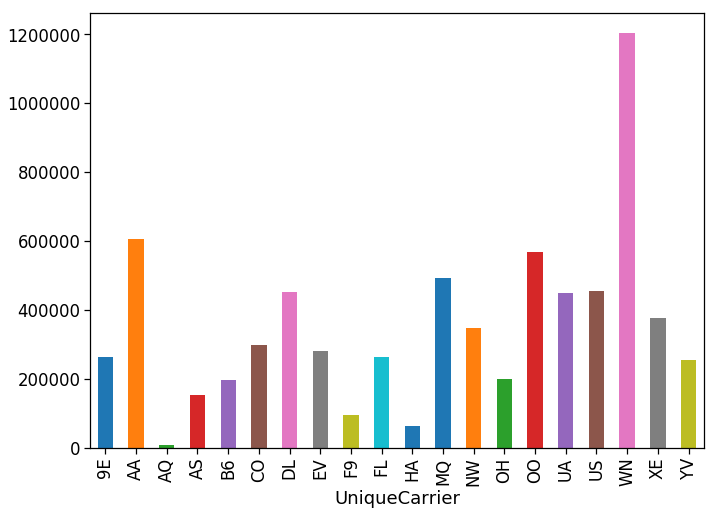

In [11]:
flights_df.groupby('UniqueCarrier').size().plot(kind='bar');

**We can also _group by_ category/categories in order to calculate different aggregated statistics.**

**For example, finding top-3 flight codes, that have the largest total distance travelled in year 2008.**

In [12]:
flights_df.groupby(['UniqueCarrier','FlightNum'])['Distance'].sum().sort_values(ascending=False).iloc[:3]

UniqueCarrier  FlightNum
CO             15           1796244.0
               14           1796244.0
UA             52           1789722.0
Name: Distance, dtype: float64

**Another way:**

In [13]:
flights_df.groupby(['UniqueCarrier','FlightNum'])\
  .agg({'Distance': [np.mean, np.sum, 'count'],
        'Cancelled': np.sum})\
  .sort_values(('Distance', 'sum'), ascending=False)\
  .iloc[0:3]

Distance                  Cancelled
                                mean        sum count       sum
UniqueCarrier FlightNum                                        
CO            15         4962.000000  1796244.0   362         0
              14         4962.000000  1796244.0   362         0
UA            52         2465.181818  1789722.0   726         8

**Number of flights by days of week and months:**

In [14]:
pd.crosstab(flights_df.Month, flights_df.DayOfWeek)

DayOfWeek       1       2       3       4       5      6      7
Month                                                          
1           80807   97298  100080  102043   81940  67178  76419
2           81504   79700   80587   82158  102726  66462  76099
3          103210   81159   82307   82831   82936  86153  97494
4           82463  100785  102586   82799   82964  68304  78225
5           80626   79884   81264  102572  102878  84493  74576
6          104168   82160   82902   83617   83930  72322  99566
7           84095  103429  103315  105035   79349  72219  80489
8           82983   80895   81773   82625  103878  86155  93970
9           94300   91533   74057   75589   75881  58343  71205
10          75131   72195   91900   94123   93894  58168  70794
11          74214   72443   73653   68071   70484  76031  88376
12          92700   90568   85241   70761   74306  61708  69674

**It can also be handy to color such tables in order to easily notice outliers:**

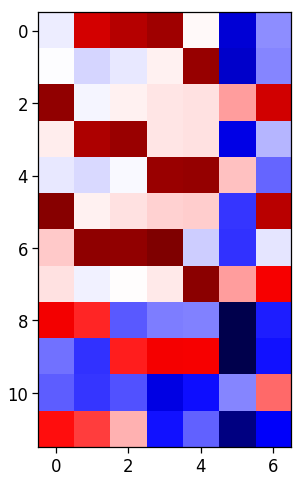

In [15]:
plt.imshow(pd.crosstab(flights_df.Month, flights_df.DayOfWeek),
           cmap='seismic', interpolation='none');

**Flight distance histogram:**

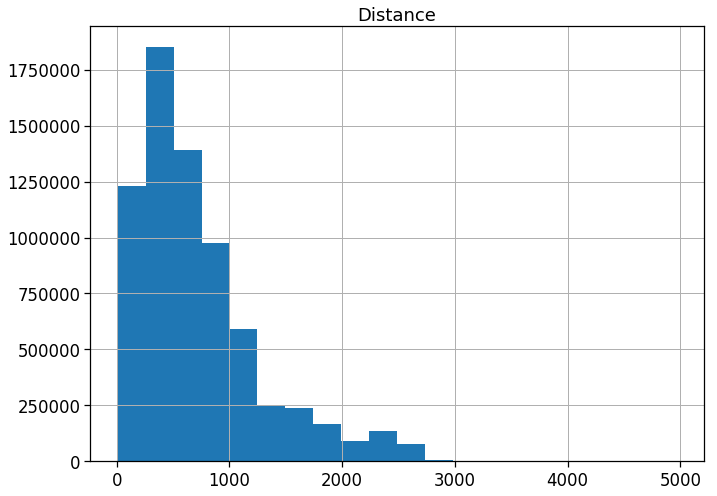

In [16]:
flights_df.hist('Distance', bins=20);

**Making a histogram of flight frequency by date.**

In [17]:
flights_df['Date'] = pd.to_datetime(flights_df.rename(columns={'DayofMonth': 'Day'})[['Year', 'Month', 'Day']])

In [18]:
num_flights_by_date = flights_df.groupby('Date').size()

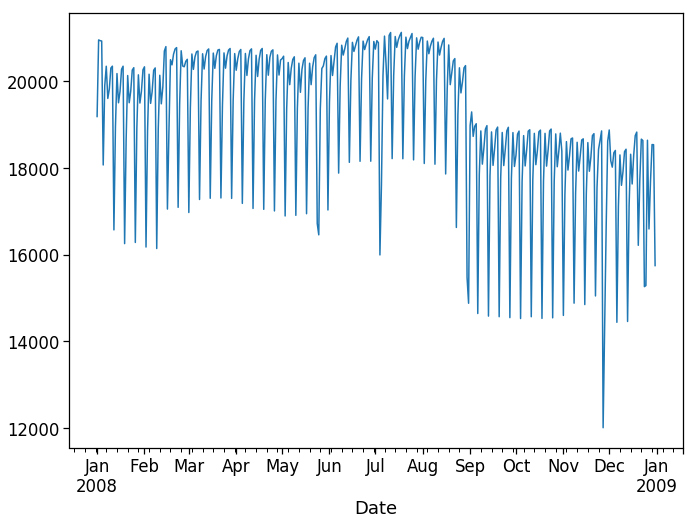

In [19]:
num_flights_by_date.plot();

**Do you see a weekly pattern above? And below?**

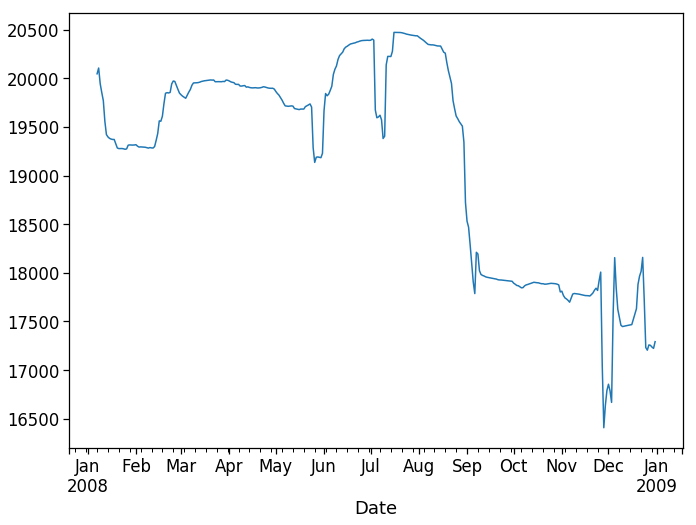

In [20]:
num_flights_by_date.rolling(window=7).mean().plot();

In [21]:
flights_df.sample(10).T

5623032              2582115  \
Year                              2008                 2008   
Month                               10                    5   
DayofMonth                           5                   17   
DayOfWeek                            7                    6   
DepTime                           1130                 1314   
UniqueCarrier                       US                   OO   
FlightNum                          966                 2753   
ArrDelay                           -12                   10   
DepDelay                            -5                    4   
Origin                             CLT                  MKE   
Dest                               BNA                  DSM   
Distance                           329                  311   
Cancelled                            0                    0   
CancellationCode                   NaN                  NaN   
CarrierDelay                       NaN                  NaN   
WeatherDelay                       NaN                  NaN   
NASDelay                           NaN                  NaN   
SecurityDelay                      NaN                  NaN   
LateAircraftDelay                  NaN                  NaN   
Date               2008-10-05 00:00:00  2008-05-17 00:00:00   

                               744695               4638832  \
Year                              2008                 2008   
Month                                2                    8   
DayofMonth                          25                   16   
DayOfWeek                            1                    6   
DepTime                           2150                  658   
UniqueCarrier                       YV                   MQ   
FlightNum                         2793                 3837   
ArrDelay                            -3                    4   
DepDelay                            -4                   -2   
Origin                             PSP                  DFW   
Dest                               LAS                  HOU   
Distance                           173                  247   
Cancelled                            0                    0   
CancellationCode                   NaN                  NaN   
CarrierDelay                       NaN                  NaN   
WeatherDelay                       NaN                  NaN   
NASDelay                           NaN                  NaN   
SecurityDelay                      NaN                  NaN   
LateAircraftDelay                  NaN                  NaN   
Date               2008-02-25 00:00:00  2008-08-16 00:00:00   

                               703002               465394   \
Year                              2008                 2008   
Month                                2                    1   
DayofMonth                          29                   20   
DayOfWeek                            5                    7   
DepTime                           1753                 1456   
UniqueCarrier                       XE                   9E   
FlightNum                         2499                 5612   
ArrDelay                           -18                   13   
DepDelay                            -7                    6   
Origin                             DAL                  MSP   
Dest                               IAH                  GFK   
Distance                           217                  284   
Cancelled                            0                    0   
CancellationCode                   NaN                  NaN   
CarrierDelay                       NaN                  NaN   
WeatherDelay                       NaN                  NaN   
NASDelay                           NaN                  NaN   
SecurityDelay                      NaN                  NaN   
LateAircraftDelay                  NaN                  NaN   
Date               2008-02-29 00:00:00  2008-01-20 00:00:00   

                               3905090              2473797

In [22]:
flights_df.reset_index(inplace=True)

**1. Find top-10 carriers in terms of the number of completed flights (_UniqueCarrier_ column)?**

**Which of the listed below is _not_ in your top-10 list?**
- DL
- AA
- OO
- EV ###

In [23]:
flights_df.groupby('UniqueCarrier')['index'].count().sort_values(ascending=False).iloc[:10]

UniqueCarrier
WN    1201754
AA     604885
OO     567159
MQ     490693
US     453589
DL     451931
UA     449515
XE     374510
NW     347652
CO     298455
Name: index, dtype: int64

**2. Plot distributions of flight cancellation reasons (_CancellationCode_).**
**What is the most frequent reason for flight cancellation? (Use this [link](https://www.transtats.bts.gov/Fields.asp?Table_ID=236) to translate codes into reasons)**
- carrier
- weather conditions ###
- National Air System
- security reasons  
**Пока хз как построить Plot**

In [24]:
flights_df['CancellationReason'] = flights_df[flights_df.Cancelled == 1].CancellationCode.apply(
    lambda x: {'A': 'Carrier', 'B': 'Weather', 'C': 'National Air System', 'D': 'Security Reasons'}.get(x))

In [25]:
flights_df[flights_df.Cancelled == 1].groupby('CancellationReason').index.count().sort_values(ascending=False)

CancellationReason
Weather                54904
Carrier                54330
National Air System    28188
Security Reasons          12
Name: index, dtype: int64

**3. Which route is the most frequent, in terms of the number of flights?**

(Take a look at _'Origin'_ and _'Dest'_ features. Consider _A->B_ and _B->A_ directions as _different_ routes) 

 - New-York – Washington
 - San-Francisco – Los-Angeles ###
 - San-Jose – Dallas
 - New-York – San-Francisco

In [27]:
flights_df = flights_df.assign(Route = lambda x: x.Origin + ' -> ' + x.Dest)

In [28]:
flights_df.groupby('Route').index.count().sort_values(ascending=False).to_frame().iloc[0]

index    13788
Name: SFO -> LAX, dtype: int64

**4. Find top-5 delayed routes (count how many times they were delayed on departure). From all flights on these 5 routes, count all flights with weather conditions contributing to a delay.**

- 449 
- 539 
- 549 
- 668 

In [30]:
[x for x in flights_df.columns if 'Delay' in x]

['ArrDelay',
 'DepDelay',
 'CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay']

In [57]:
flights_df.groupby('Route').DepDelay.count().sort_values(ascending=False)[:5].to_dict()

{'SFO -> LAX': 13299,
 'LAX -> SFO': 12935,
 'OGG -> HNL': 12138,
 'HNL -> OGG': 11779,
 'LAX -> LAS': 11562}

In [76]:
flights_from_top5_routes = flights_df[
    (flights_df.Route == 'SFO -> LAX') |
    (flights_df.Route == 'LAX -> SFO') |
    (flights_df.Route == 'OGG -> HNL') |
    (flights_df.Route == 'HNL -> OGG') |
    (flights_df.Route == 'LAX -> LAS') 
    ]

In [81]:
flights_from_top5_routes[flights_from_top5_routes.WeatherDelay > 0].count()

index                 235
Year                  235
Month                 235
DayofMonth            235
DayOfWeek             235
DepTime               235
UniqueCarrier         235
FlightNum             235
ArrDelay              235
DepDelay              235
Origin                235
Dest                  235
Distance              235
Cancelled             235
CancellationCode        0
CarrierDelay          235
WeatherDelay          235
NASDelay              235
SecurityDelay         235
LateAircraftDelay     235
Date                  235
CancellationReason      0
Route                 235
dtype: int64

In [ ]:
# flights_df.WeatherDelay.replace('NaN', np.nan, inplace=True)

In [ ]:
# flights_df.groupby('Route')['WeatherDelay'].count().sort_values(ascending=False).to_frame().head(5)

In [ ]:
# flights_df.groupby('Route')['WeatherDelay'].value_counts().sort_values(ascending=False)

**5. Examine the hourly distribution of departure times. For that, create a new series from DepTime, removing missing values.**

**Choose all correct statements:**
 - Flights are normally distributed within time interval [0-23] (Search for: Normal distribution, bell curve).
 - Flights are uniformly distributed within time interval [0-23].
 - In the period from 0 am to 4 am there are considerably less flights than from 7 pm to 8 pm.

In [ ]:
# You code here

**6. Show how the number of flights changes through time (on the daily/weekly/monthly basis) and interpret the findings.**

**Choose all correct statements:**
- The number of flights during weekends is less than during weekdays (working days).
- The lowest number of flights is on Sunday.
- There are less flights during winter than during summer.  

In [ ]:
# You code here

**7. Examine the distribution of cancellation reasons with time. Make a bar plot of cancellation reasons aggregated by months.**

**Choose all correct statements:**
- December has the highest rate of cancellations due to weather. 
- The highest rate of cancellations in September is due to Security reasons.
- April's top cancellation reason is carriers.
- Flights cancellations due to National Air System are more frequent than those due to carriers.

In [ ]:
# You code here

**8. Which month has the greatest number of cancellations due to Carrier?** 
- May
- January
- September
- April 

In [ ]:
# You code here

**9. Identify the carrier with the greatest number of cancellations due to carrier in the corresponding month from the previous question.**

- 9E
- EV
- HA
- AA

In [ ]:
# You code here

**10. Examine median arrival and departure delays (in time) by carrier. Which carrier has the lowest median delay time for both arrivals and departures? Leave only non-negative values of delay times ('ArrDelay', 'DepDelay').
[Boxplots](https://seaborn.pydata.org/generated/seaborn.boxplot.html) can be helpful in this exercise, as well as it might be a good idea to remove outliers in order to build nice graphs. You can exclude delay time values higher than a corresponding .95 percentile.**

- EV
- OO
- AA
- AQ 

In [ ]:
# You code here